In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from env import get_db_url

## Acquire/Prep

In [2]:
try:
    df = pd.read_csv('logs.csv')
except FileNotFoundError:
    url = get_db_url('curriculum_logs')
    query = "select id, name, start_date, end_date, program_id, user_id, path, ip , date, time from cohorts right join logs on cohorts.id = logs.cohort_id"
    df = pd.read_sql(query, url)
    df.to_csv('logs.csv', index=False)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          847330 non-null  float64
 1   name        847330 non-null  object 
 2   start_date  847330 non-null  object 
 3   end_date    847330 non-null  object 
 4   program_id  847330 non-null  float64
 5   user_id     900223 non-null  int64  
 6   path        900222 non-null  object 
 7   ip          900223 non-null  object 
 8   date        900223 non-null  object 
 9   time        900223 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 68.7+ MB


In [4]:
df.isna().sum()

id            52893
name          52893
start_date    52893
end_date      52893
program_id    52893
user_id           0
path              1
ip                0
date              0
time              0
dtype: int64

In [5]:
df.head()

,id,name,start_date,end_date,program_id,user_id,path,ip,date,time
0,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,/,97.105.19.61,2018-01-26,09:55:03
1,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,java-ii,97.105.19.61,2018-01-26,09:56:02
2,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,java-ii/object-oriented-programming,97.105.19.61,2018-01-26,09:56:05
3,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,slides/object_oriented_programming,97.105.19.61,2018-01-26,09:56:06
4,22.0,Teddy,2018-01-08,2018-05-17,2.0,2,javascript-i/conditionals,97.105.19.61,2018-01-26,09:56:24


In [6]:
df['date_time'] = df.date + ' ' + df.time

In [7]:
df.date_time = pd.to_datetime(df.date_time)

In [8]:
df.head()

,id,name,start_date,end_date,program_id,user_id,path,ip,date,time,date_time
0,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,/,97.105.19.61,2018-01-26,09:55:03,2018-01-26 09:55:03
1,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,java-ii,97.105.19.61,2018-01-26,09:56:02,2018-01-26 09:56:02
2,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,java-ii/object-oriented-programming,97.105.19.61,2018-01-26,09:56:05,2018-01-26 09:56:05
3,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,slides/object_oriented_programming,97.105.19.61,2018-01-26,09:56:06,2018-01-26 09:56:06
4,22.0,Teddy,2018-01-08,2018-05-17,2.0,2,javascript-i/conditionals,97.105.19.61,2018-01-26,09:56:24,2018-01-26 09:56:24


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          847330 non-null  float64       
 1   name        847330 non-null  object        
 2   start_date  847330 non-null  object        
 3   end_date    847330 non-null  object        
 4   program_id  847330 non-null  float64       
 5   user_id     900223 non-null  int64         
 6   path        900222 non-null  object        
 7   ip          900223 non-null  object        
 8   date        900223 non-null  object        
 9   time        900223 non-null  object        
 10  date_time   900223 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 75.5+ MB


In [10]:
df.set_index(df.date_time, inplace=True)

In [11]:
df.drop(columns=['time', 'date_time'])

,id,name,start_date,end_date,program_id,user_id,path,ip,date
date_time,,,,,,,,,
2018-01-26 09:55:03,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,/,97.105.19.61,2018-01-26
2018-01-26 09:56:02,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,java-ii,97.105.19.61,2018-01-26
2018-01-26 09:56:05,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,java-ii/object-oriented-programming,97.105.19.61,2018-01-26
2018-01-26 09:56:06,8.0,Hampton,2015-09-22,2016-02-06,1.0,1,slides/object_oriented_programming,97.105.19.61,2018-01-26
2018-01-26 09:56:24,22.0,Teddy,2018-01-08,2018-05-17,2.0,2,javascript-i/conditionals,97.105.19.61,2018-01-26
...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,28.0,Staff,2014-02-04,2014-02-04,2.0,64,jquery/personal-site,71.150.217.33,2021-04-21
2021-04-21 16:42:02,28.0,Staff,2014-02-04,2014-02-04,2.0,64,jquery/mapbox-api,71.150.217.33,2021-04-21
2021-04-21 16:42:09,28.0,Staff,2014-02-04,2014-02-04,2.0,64,jquery/ajax/weather-map,71.150.217.33,2021-04-21


In [12]:
df.loc[df['name'] == 'Staff', 'program_id'] = 5

In [13]:
df[df.name == "Staff"]

,id,name,start_date,end_date,program_id,user_id,path,ip,date,time,date_time
date_time,,,,,,,,,,,
2018-12-06 14:15:29,28.0,Staff,2014-02-04,2014-02-04,5.0,53,appendix/further-reading/java/intellij-tomcat-...,97.105.19.58,2018-12-06,14:15:29,2018-12-06 14:15:29
2018-12-06 14:25:40,28.0,Staff,2014-02-04,2014-02-04,5.0,314,javascript-i,97.105.19.58,2018-12-06,14:25:40,2018-12-06 14:25:40
2018-12-06 14:25:41,28.0,Staff,2014-02-04,2014-02-04,5.0,314,javascript-i/coffee-project,97.105.19.58,2018-12-06,14:25:41,2018-12-06 14:25:41
2018-12-06 15:31:29,28.0,Staff,2014-02-04,2014-02-04,5.0,40,spring,170.248.173.247,2018-12-06,15:31:29,2018-12-06 15:31:29
2018-12-06 15:31:33,28.0,Staff,2014-02-04,2014-02-04,5.0,40,spring/fundamentals/security,170.248.173.247,2018-12-06,15:31:33,2018-12-06 15:31:33
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,28.0,Staff,2014-02-04,2014-02-04,5.0,64,jquery/personal-site,71.150.217.33,2021-04-21,16:41:51,2021-04-21 16:41:51
2021-04-21 16:42:02,28.0,Staff,2014-02-04,2014-02-04,5.0,64,jquery/mapbox-api,71.150.217.33,2021-04-21,16:42:02,2021-04-21 16:42:02
2021-04-21 16:42:09,28.0,Staff,2014-02-04,2014-02-04,5.0,64,jquery/ajax/weather-map,71.150.217.33,2021-04-21,16:42:09,2021-04-21 16:42:09


In [14]:
df.program_id.value_counts()

2.0    629334
3.0    103412
5.0     84031
1.0     30548
4.0         5
Name: program_id, dtype: int64

In [15]:
df[df.program_id == 4]

,id,name,start_date,end_date,program_id,user_id,path,ip,date,time,date_time
date_time,,,,,,,,,,,
2018-03-22 19:01:49,9.0,Apollo,2015-03-30,2015-07-29,4.0,152,/,207.68.209.17,2018-03-22,19:01:49,2018-03-22 19:01:49
2018-03-22 19:01:54,9.0,Apollo,2015-03-30,2015-07-29,4.0,152,content/html-css,207.68.209.17,2018-03-22,19:01:54,2018-03-22 19:01:54
2018-03-22 19:01:54,9.0,Apollo,2015-03-30,2015-07-29,4.0,152,content/html-css/gitbook/images/favicon.ico,207.68.209.17,2018-03-22,19:01:54,2018-03-22 19:01:54
2018-03-22 19:02:47,9.0,Apollo,2015-03-30,2015-07-29,4.0,152,content/html-css,207.68.209.17,2018-03-22,19:02:47,2018-03-22 19:02:47
2018-03-22 19:02:52,9.0,Apollo,2015-03-30,2015-07-29,4.0,152,content/html-css/introduction.html,207.68.209.17,2018-03-22,19:02:52,2018-03-22 19:02:52


In [305]:
df[df.program_id == 1].path.str.contains('(javascript|java|html|css|jquery|object_oriented_programming)').value_counts()


/var/folders/ng/82m_197x6jd7ysrq5l2vxd280000gn/T/ipykernel_32150/2718205872.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df.program_id == 1].path.str.contains('(javascript|java|html|css|jquery|object_oriented_programming)').value_counts()


True     432648
False    227234
Name: path, dtype: int64

- program_id 1 is most likely web_dev based on the amount of times that webdev curriculum courses are accesed

In [309]:
df[df.program_id == 2].path.str.contains('(javascript|java|html|css|jquery|object_oriented_programming)').value_counts()

/var/folders/ng/82m_197x6jd7ysrq5l2vxd280000gn/T/ipykernel_32150/761621176.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df.program_id == 2].path.str.contains('(javascript|java|html|css|jquery|object_oriented_programming)').value_counts()


False    103086
True        325
Name: path, dtype: int64

- program_id 2 is most likely web_dev based on the amount of times that webdev curriculum courses are accesed

In [308]:
df[df.program_id == 3].path.str.contains('(javascript|java|html|css|jquery)').value_counts()

/var/folders/ng/82m_197x6jd7ysrq5l2vxd280000gn/T/ipykernel_32150/654221564.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df.program_id == 3].path.str.contains('(javascript|java|html|css|jquery)').value_counts()


False    52290
True     31741
Name: path, dtype: int64

In [310]:
df[df.program_id == 4].path.str.contains('(javascript|java|html|css|jquery)').value_counts()

/var/folders/ng/82m_197x6jd7ysrq5l2vxd280000gn/T/ipykernel_32150/154440998.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df.program_id == 4].path.str.contains('(javascript|java|html|css|jquery)').value_counts()


True     4
False    1
Name: path, dtype: int64

In [19]:
df[df.program_id == 5].path.str.contains('(javascript|java|html|css|jquery)').value_counts()

/var/folders/ng/82m_197x6jd7ysrq5l2vxd280000gn/T/ipykernel_32150/3745163319.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df.program_id == 5].path.str.contains('(javascript|java|html|css|jquery)').value_counts()


False    52290
True     31741
Name: path, dtype: int64

- program id 3 is most likely Data scicence based off the lack of webdev courses accesed.  

In [20]:
# takes program 1 and 2 and sets both to 1 for WEBDEV
df.program_id = np.where((df.program_id == 1) | (df.program_id == 2), 1, df.program_id)

In [21]:
# takes program 3 and changes it to 2 for Data Science
df.loc[df.program_id == 3, 'program_id'] = 2

In [22]:
# changes the staff program id to 3
df.loc[df['name'] == 'Staff', 'program_id'] = 3

- program id 3 is staff 
- program id 4 is a random early student form 2015 that had accessed the curicculum again after the logs were being recorded 

In [311]:
df.program_id.value_counts()

1.0    659882
2.0    103412
3.0     84031
0.0     52893
4.0         5
Name: program_id, dtype: int64

In [24]:
conditions = [
    df['program_id'] == 1,
    df['program_id'] == 2,
    df['program_id'] == 3
]

choices = [
    'Web_dev',
    'Data Science',
    'Staff'
]

df['program'] = np.select(conditions, choices)
    
    

In [73]:
df.rename(columns={'id': 'cohort_id'}, inplace=True)

In [26]:
df.fillna(0, inplace=True)

In [27]:
df.isna().sum()

id            0
name          0
start_date    0
end_date      0
program_id    0
user_id       0
path          0
ip            0
date          0
time          0
date_time     0
program       0
dtype: int64

#### Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [28]:
df.ip.nunique()

5531

In [29]:
unique_ip = df['ip'].unique().tolist()

In [323]:
len(unique_ip)

5531

In [50]:
if len(unique_ip) != len(set(unique_ip)):
    print("The list contains duplicates.")
else:
    print("The list does not contain duplicates.")

The list does not contain duplicates.


In [52]:
df['ip_origin_country'] = ''

In [51]:
from ip2geotools.databases.noncommercial import DbIpCity
count = 0 
# get the country information for an IP address
for ip in unique_ip:
    response = DbIpCity.get(ip, api_key='free')
    count+=1
    # check if the IP address is from the US
    if response.country != 'US':
        print(f"The IP address {ip} is from a different country ({response.country}).")
    else:
        



The IP address 196.52.2.30 is from a different country (MU).
The IP address 196.52.2.70 is from a different country (MU).
The IP address 196.52.2.49 is from a different country (MU).
The IP address 196.52.2.52 is from a different country (MU).
The IP address 187.220.23.224 is from a different country (MX).
The IP address 196.52.39.2 is from a different country (MU).
The IP address 196.52.39.32 is from a different country (MU).
The IP address 189.146.56.56 is from a different country (MX).
The IP address 201.103.134.102 is from a different country (MX).
The IP address 80.137.93.59 is from a different country (DE).
The IP address 189.146.46.149 is from a different country (MX).
The IP address 196.52.39.29 is from a different country (MU).
The IP address 196.52.39.11 is from a different country (MU).
The IP address 104.156.210.199 is from a different country (FR).
The IP address 196.52.39.23 is from a different country (MU).
The IP address 104.156.210.198 is from a different country (FR).

InvalidRequestError: 

In [113]:
# from ip2geotools.databases.noncommercial import DbIpCity
# count = 0 
# # get the country information for an IP address
# for ip in unique_ip:
#     response = DbIpCity.get(ip, api_key='free')
#     count+=1
#     # check if the IP address is from the US
#     if response.country != 'US':
#         print(f"The IP address {ip} is from a different country ({response.country}).")


In [190]:
ip_dict = {}

In [188]:
ip_dict['123.3252.22.'] = 'USA'

In [340]:
# ip_dict

In [325]:
for ip in unique_ip:
    if ip in ip_dict:
        pass
    else:
        response = DbIpCity.get(ip, api_key='free')
        ip_dict[ip] = response.country
         #df.at[df.index[i], 'ip_origin_country'] = response.country
 


InvalidRequestError: 

In [203]:
# for ip in unique_ip:
#     if ip in ip_dict:
#         print(ip)
#     else:
#         print('not ip')

In [326]:
len(ip_dict)

1114

In [167]:
df.ip.iloc[0]

'97.105.19.61'

In [153]:
df['ip_origin_country'] = 'test'

In [164]:
df.at[df.index[0], 'ip_origin_country'] = 'test'

In [195]:
# df[df.ip_origin_country != "US"]

In [75]:
id_counts = df.groupby('user_id')[['path','date','cohort_id']].nunique()

In [86]:
id_counts

,path,date,cohort_id
user_id,,,
1,976,637,2
2,151,83,1
3,169,107,1
4,143,54,1
5,197,82,1
...,...,...,...
977,12,10,1
978,18,9,1
979,20,9,1


In [77]:
cohort_counts = df.groupby('cohort_id')[['path','date','user_id']].nunique()

In [85]:
cohort_counts

,path,date,user_id
cohort_id,,,
0.0,1112,964,78
1.0,342,278,18
2.0,44,12,3
4.0,4,1,1
5.0,1,1,1
6.0,45,12,2
7.0,143,46,6
8.0,278,162,5
9.0,4,1,1


In [79]:
df['date'] = pd.to_datetime(df['date'])
first_access = df.groupby('user_id').date.min()

In [84]:
first_access

user_id
1     2018-01-26
2     2018-01-26
3     2018-01-26
4     2018-01-26
5     2018-01-26
         ...    
977   2021-04-12
978   2021-04-12
979   2021-04-12
980   2021-04-13
981   2021-04-19
Name: date, Length: 981, dtype: datetime64[ns]

In [80]:
first_access_date = pd.DataFrame({'first_access_date': first_access}).reset_index()

In [83]:
first_access_date

,user_id,first_access_date
0,1,2018-01-26
1,2,2018-01-26
2,3,2018-01-26
3,4,2018-01-26
4,5,2018-01-26
...,...,...
976,977,2021-04-12
977,978,2021-04-12
978,979,2021-04-12
979,980,2021-04-13


In [81]:
id_by_first_access_date = first_access_date.groupby(['first_access_date']).count()

In [82]:
id_by_first_access_date

,user_id
first_access_date,
2018-01-26,50
2018-01-27,2
2018-01-28,2
2018-01-29,12
2018-01-30,7
...,...
2021-04-08,1
2021-04-11,1
2021-04-12,26


#### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [231]:
df2 = df[df.path != '/']

In [232]:
cohort_path_visit_counts = df2.groupby(['cohort_id', 'path']).size().reset_index(name='visit_count')

In [234]:
cohort_total

0        48434
1        48434
2        48434
3        48434
4        48434
         ...  
14625     1541
14626     1541
14627     1541
14628     1541
14629     1541
Name: visit_count, Length: 14630, dtype: int64

In [235]:
cohort_path_visit_counts['visits_precent'] = cohort_path_visit_counts.visit_count/cohort_total

In [241]:
cohort_path_visit_counts.groupby('path').visits_precent.mean().sort_values(ascending=False).head()

path
prework/versioning/github    0.167000
prework/databases            0.067597
content/html-css             0.029863
mkdocs/search_index.json     0.026619
javascript-i                 0.025642
Name: visits_precent, dtype: float64

In [242]:
program_path_visit_counts = df2.groupby(['program_id', 'path']).size().reset_index(name='visit_count')  

In [244]:
program_total = program_path_visit_counts.groupby('program_id').visit_count.transform('sum')

In [246]:
program_path_visit_counts['visits_precent'] = program_path_visit_counts.visit_count/program_total

In [247]:
program_path_visit_counts.groupby('path').visits_precent.mean().sort_values(ascending=False).head()

path
content/html-css                               0.125211
content/html-css/gitbook/images/favicon.ico    0.062594
content/html-css/introduction.html             0.062584
search/search_index.json                       0.025941
javascript-i                                   0.016411
Name: visits_precent, dtype: float64

#### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

#### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [251]:
df.end_date = pd.to_datetime(df.end_date)

In [261]:
df.start_date = pd.to_datetime(df.start_date)

In [263]:
active_entries = df[df.index < df.end_date]

In [266]:
total_user_entries = active_entries.groupby(['user_id']).path.count()

In [272]:
unique_user_entries = active_entries.groupby(['user_id']).path.nunique()

In [270]:
active_entries['duration'] = active_entries.end_date - active_entries.start_date

/var/folders/ng/82m_197x6jd7ysrq5l2vxd280000gn/T/ipykernel_32150/3432496927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_entries['duration'] = active_entries.end_date - active_entries.start_date


In [275]:
unique_user_entries.sort_values(ascending=True).head(20)

user_id
918.0     1
940.0     1
619.0     1
879.0     1
278.0     3
832.0     3
956.0     4
388.0     4
679.0     5
539.0     5
812.0     6
64.0      8
889.0     9
487.0     9
968.0     9
981.0     9
772.0     9
697.0    10
340.0    10
941.0    10
Name: path, dtype: int64

In [ ]:
active_entries

#### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [ ]:
df[df.program_id == 3].path.str.contains('(javascript|java|html|css|jquery)').value_counts()

In [312]:
ds_students_webdev = df[(df.program == 'Data Science') & (df.path.str.contains('(javascript|java|html|css|jquery|object_oriented_programming)'))]

/var/folders/ng/82m_197x6jd7ysrq5l2vxd280000gn/T/ipykernel_32150/1515820089.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ds_students_webdev = df[(df.program == 'Data Science') & (df.path.str.contains('(javascript|java|html|css|jquery|object_oriented_programming)'))]


In [327]:
ds_students_webdev.index = pd.to_datetime(ds_students_webdev.index)

AttributeError: 'DatetimeIndex' object has no attribute 'plot'

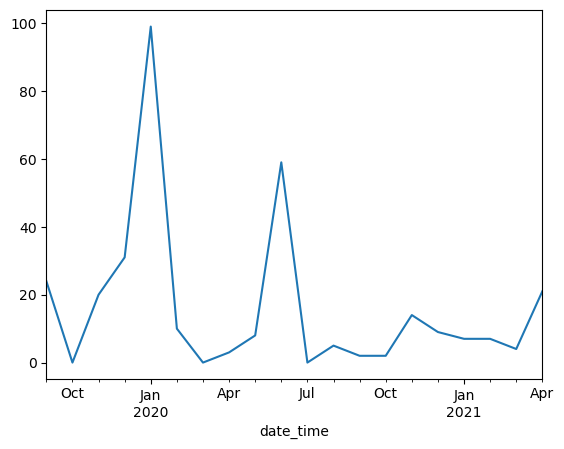

In [339]:
ds_students_webdev.path.resample('M').count().plot()
plt.show()

#### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

#### 7. Which lessons are least accessed?

In [337]:
df.groupby('path').size().sort_values().head(40)

path
0                                                                           1
capstone/55                                                                 1
capstone/index                                                              1
capstone/index.md                                                           1
capstone/jupiter                                                            1
capstone/team                                                               1
capstone/teams                                                              1
case-statements                                                             1
cheatsheet.tex                                                              1
classification/explore-old                                                  1
classification/knn.md                                                       1
cli/4-navigating-the-filesystem                                             1
code-standards/html-css                                    

In [333]:
df

,cohort_id,name,start_date,end_date,program_id,user_id,path,ip,date,time,date_time,program,ip_origin_country
date_time,,,,,,,,,,,,,
2018-01-26 09:55:03,8.0,Hampton,2015-09-22,2016-02-06,1.0,1.0,/,97.105.19.61,2018-01-26,09:55:03,2018-01-26 09:55:03,Web_dev,US
2018-01-26 09:56:02,8.0,Hampton,2015-09-22,2016-02-06,1.0,1.0,java-ii,97.105.19.61,2018-01-26,09:56:02,2018-01-26 09:56:02,Web_dev,US
2018-01-26 09:56:05,8.0,Hampton,2015-09-22,2016-02-06,1.0,1.0,java-ii/object-oriented-programming,97.105.19.61,2018-01-26,09:56:05,2018-01-26 09:56:05,Web_dev,US
2018-01-26 09:56:06,8.0,Hampton,2015-09-22,2016-02-06,1.0,1.0,slides/object_oriented_programming,97.105.19.61,2018-01-26,09:56:06,2018-01-26 09:56:06,Web_dev,US
2018-01-26 09:56:24,22.0,Teddy,2018-01-08,2018-05-17,1.0,2.0,javascript-i/conditionals,97.105.19.61,2018-01-26,09:56:24,2018-01-26 09:56:24,Web_dev,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:42:09,28.0,Staff,2014-02-04,2014-02-04,3.0,64.0,jquery/ajax/weather-map,71.150.217.33,2021-04-21,16:42:09,2021-04-21 16:42:09,Staff,test2
2021-04-21 16:44:37,28.0,Staff,2014-02-04,2014-02-04,3.0,744.0,anomaly-detection/discrete-probabilistic-methods,24.160.137.86,2021-04-21,16:44:37,2021-04-21 16:44:37,Staff,test2
2021-04-21 16:44:39,28.0,Staff,2014-02-04,2014-02-04,3.0,64.0,jquery/mapbox-api,71.150.217.33,2021-04-21,16:44:39,2021-04-21 16:44:39,Staff,test2
